Exercise 2.10: Nursing Home Utilization

In [1]:
#Set the working environment
getwd()
setwd("C:\\Users\\William\\Documents\\Actuarial\\SOA - SRM exam\\Data")

df<-read.table(file="WiscNursingHome.csv", header=TRUE, sep=",")

[1] "C:/Users/William/Documents/Actuarial/SOA - SRM exam/Data"

Part 1: Use cost-report year 2000 data, and do the following analysis:

Select cost-report year 2000 perimeter.

In [ ]:
#Perimeter selection
df_2000<-df[df$CRYEAR=='2000',]

a. Compute descriptive statistics for TPY, NUMBED, and SQRFOOT

In [5]:
#Quick way
summary(df_2000)

     hospID          CRYEAR          TPY             NUMBED      
 Min.   :101.0   Min.   :2000   Min.   : 11.57   Min.   : 18.00  
 1st Qu.:312.2   1st Qu.:2000   1st Qu.: 56.72   1st Qu.: 60.25  
 Median :538.5   Median :2000   Median : 80.54   Median : 90.00  
 Mean   :538.8   Mean   :2000   Mean   : 88.79   Mean   : 97.08  
 3rd Qu.:785.8   3rd Qu.:2000   3rd Qu.:108.55   3rd Qu.:118.75  
 Max.   :980.0   Max.   :2000   Max.   :314.70   Max.   :320.00  
                                                                 
    SQRFOOT             MSA             URBAN             PRO        
 Min.   :  5.644   Min.   : 0.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 28.638   1st Qu.: 0.000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median : 39.222   Median : 1.000   Median :1.0000   Median :1.0000  
 Mean   : 50.144   Mean   : 4.691   Mean   :0.5276   Mean   :0.5138  
 3rd Qu.: 65.488   3rd Qu.:10.000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :262.000   Max.   :13.000   Max.   :1.0000  

b. Summarize the distribution of TPY using a histogram and a qq plot. Does it appear to be approximately normally distributed?

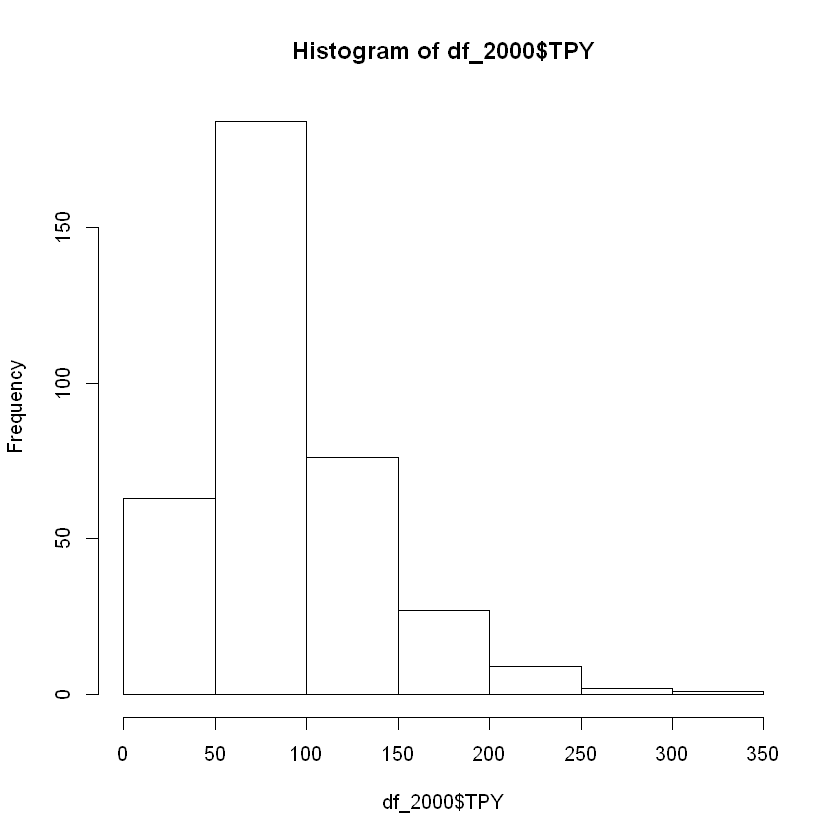

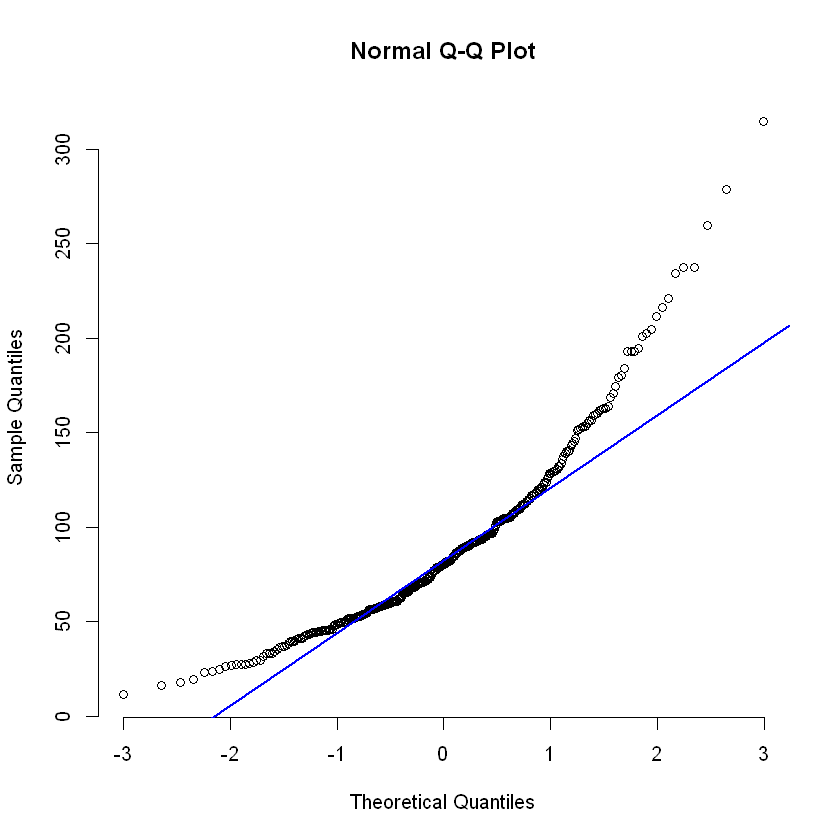

In [6]:
#histogram
hist(df_2000$TPY)

#qq-plot
qqnorm(df_2000$TPY, pch = 1, frame = FALSE)
qqline(df_2000$TPY, col = "blue", lwd = 2)

By looking at both representation, we observe that the distribution is skewed to the right. The data in presence are not normally distributed. We need some transformation on the data to proceed.

c. Transformations. 
Take a (natural) logarithmic transformation of TPY (LOGTPY). Summarize the resulting distribution using a histogram and a qq plot. Does it appear to be approximately normally distributed?

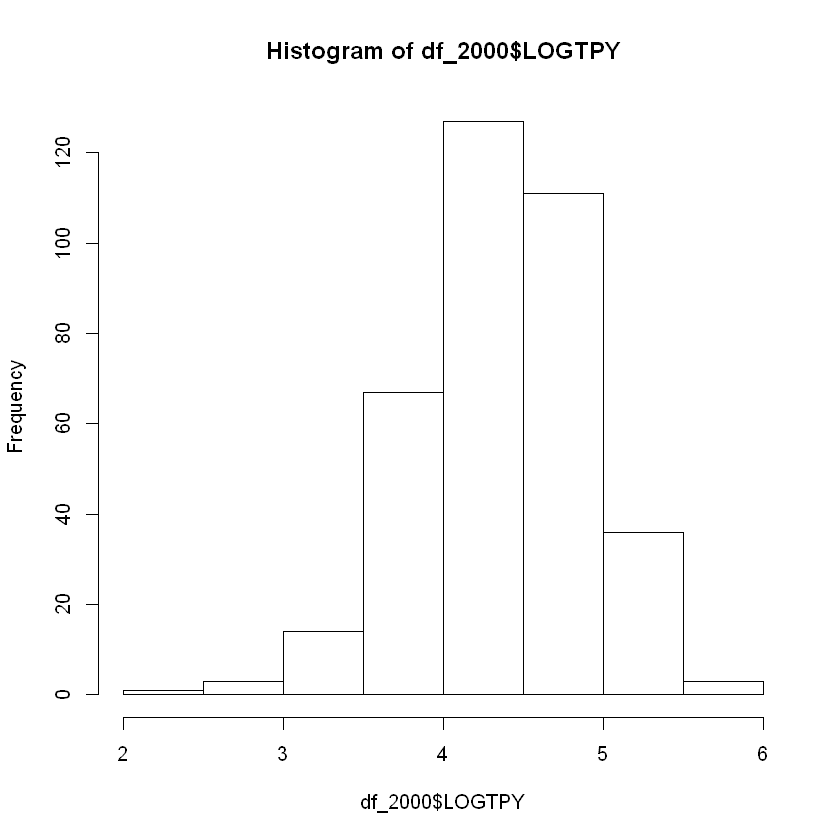

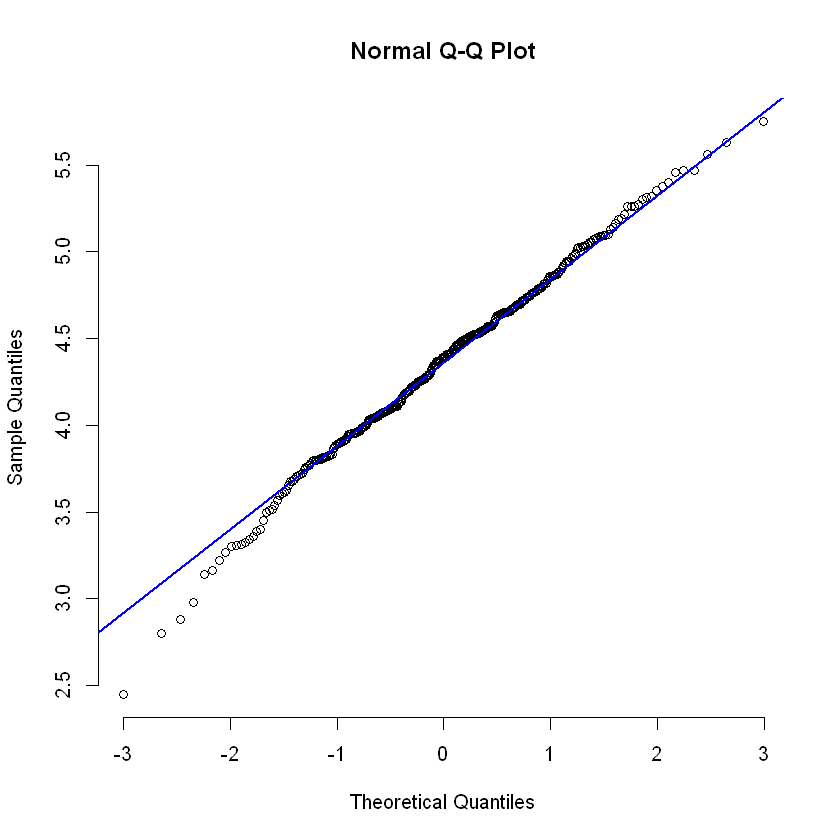

In [8]:
#transformation
df_2000$LOGTPY<-log(df_2000$TPY)

#histogram
hist(df_2000$LOGTPY)

#qq-plot
qqnorm(df_2000$LOGTPY, pch = 1, frame = FALSE)
qqline(df_2000$LOGTPY, col = "blue", lwd = 2)

Applying a logarithmic transformation to the data allows to validate the hypothesis of normality and the use of the OLS regression.

Part 2: Use cost-report year 2001 data and repeat parts (a) and (c).

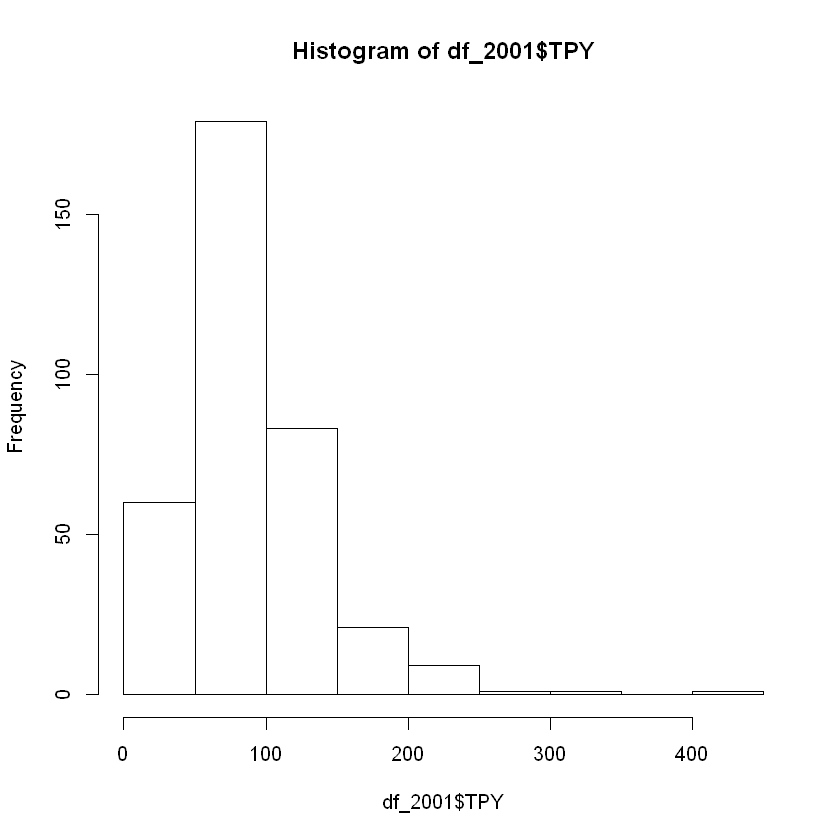

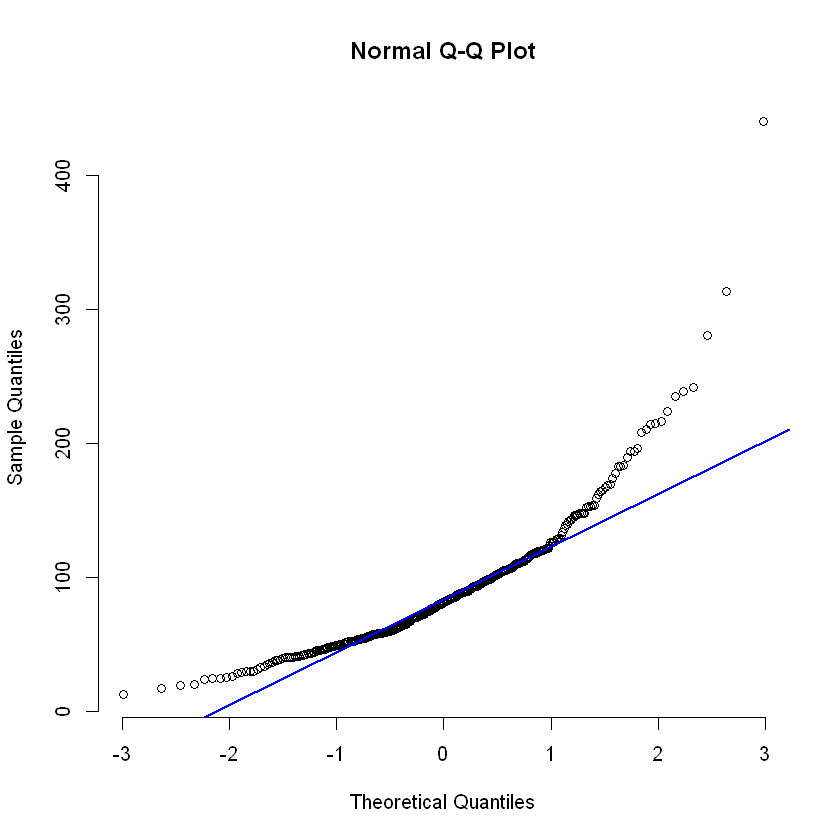

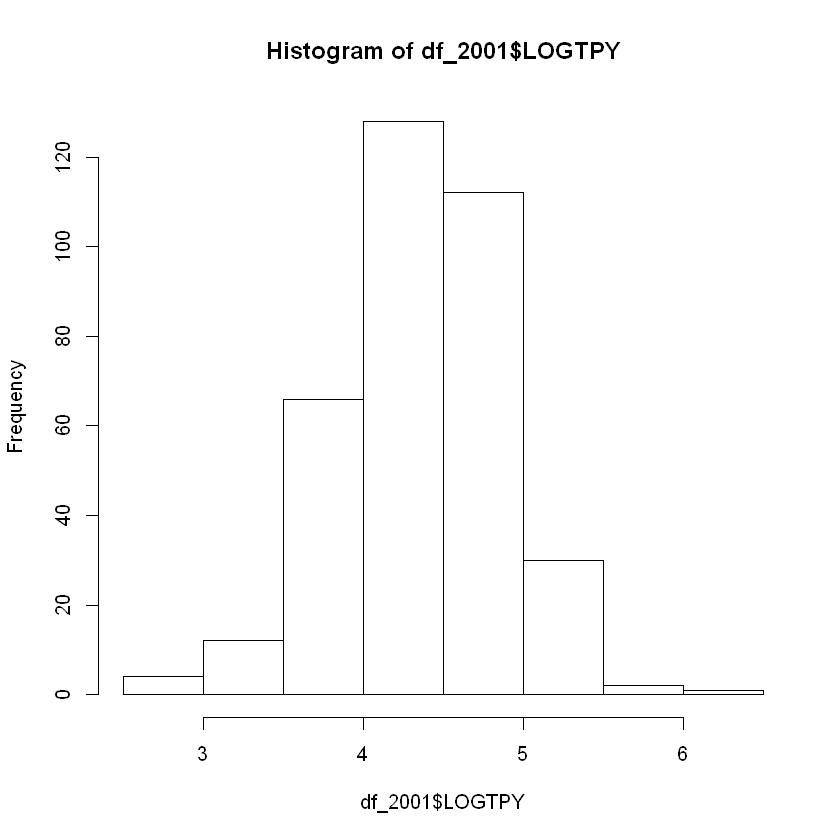

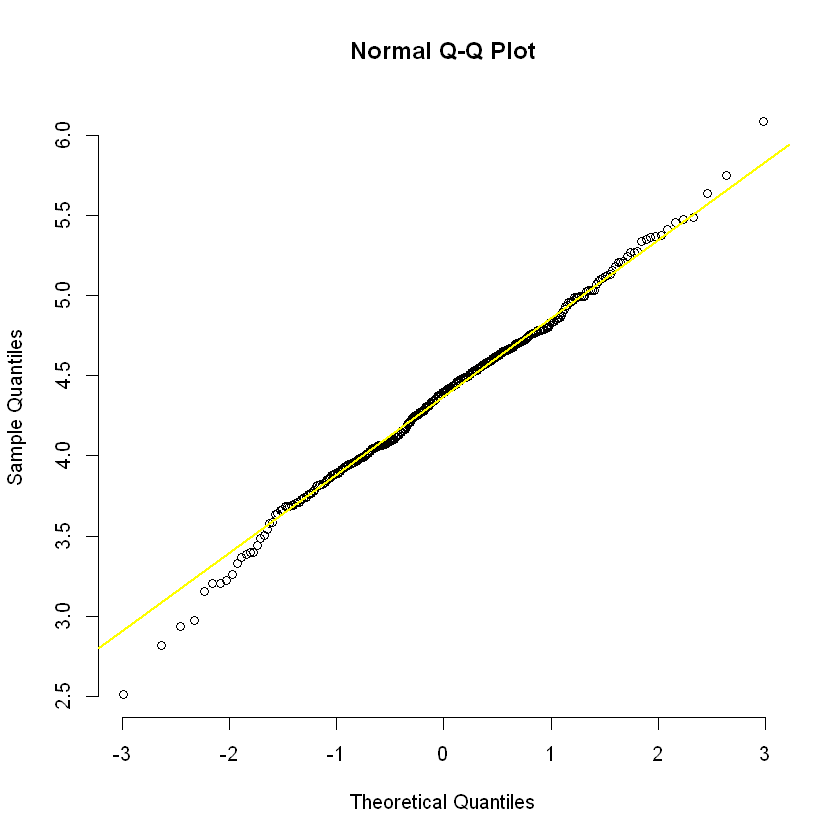

In [9]:
#Selection perimeter
df_2001<-df[df$CRYEAR=='2001',]

#histogram
hist(df_2001$TPY)

#qq-plot
qqnorm(df_2001$TPY, pch = 1, frame = FALSE)
qqline(df_2001$TPY, col = "blue", lwd = 2)

#Transformation
df_2001$LOGTPY<-log(df_2001$TPY)

#histogram
hist(df_2001$LOGTPY)

#qq-plot
qqnorm(df_2001$LOGTPY, pch = 1, frame = FALSE)
qqline(df_2001$LOGTPY, col = "yellow", lwd = 2)


a. Correlations

a(i). Calculate the correlation between TPY and LOGTPY. Comment on your result.

In [10]:
#Check on missing values

#Create new dataset without missing data
df<- na.omit(df_2000)

#Correlation coefficient
r=cor(df_2000$TPY,df_2000$LOGTPY)
print(r)

[1] 0.9371853


We observe a strong relationship between TPY and its transformation.

a(ii). Calculate the correlation among TPY, NUMBED, andSQRFOOT. Do these variables appear highly correlated?

In [11]:
matrix_cor<-cor(df[,c(3,4,5)])
print(matrix_cor)

              TPY    NUMBED   SQRFOOT
TPY     1.0000000 0.9788764 0.8244198
NUMBED  0.9788764 1.0000000 0.8191944
SQRFOOT 0.8244198 0.8191944 1.0000000


The values given by the different coefficients are above 80%. We can say that those variables are highly correlated.

a(iii). Calculate the correlation between TPY and NUMBED/10. Comment on your result

In [12]:
#Correlation coefficient
cor((df$NUMBED)/10,df$TPY)

[1] 0.9788764

High correlation between the two values.

b. Scatter plots. Plot TPY versus NUMBED and TPY versus SQRFOOT.Comment on the plots.

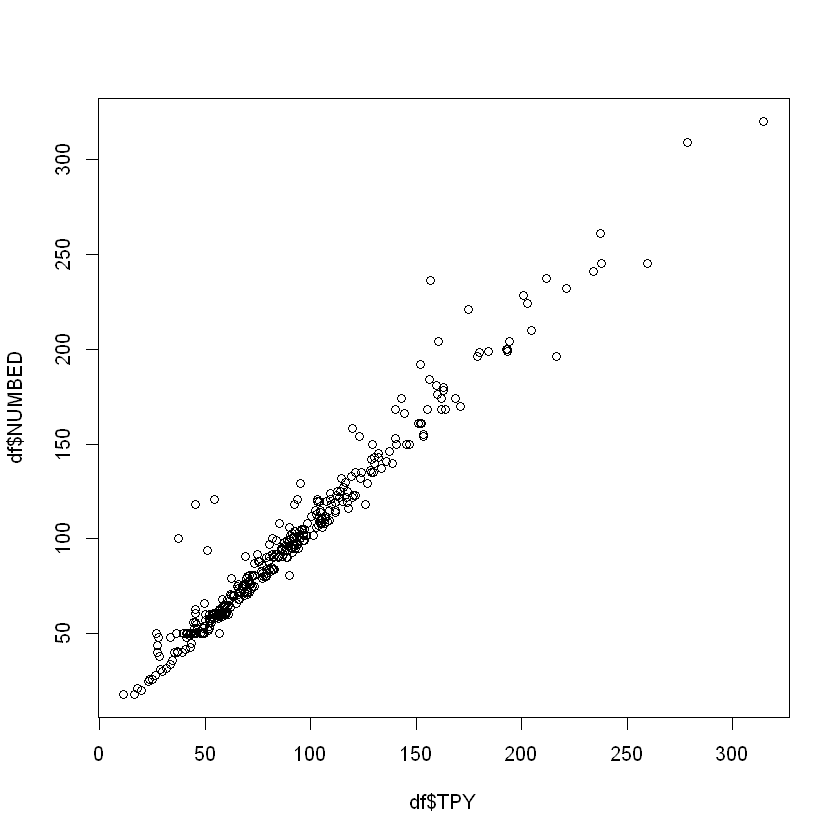

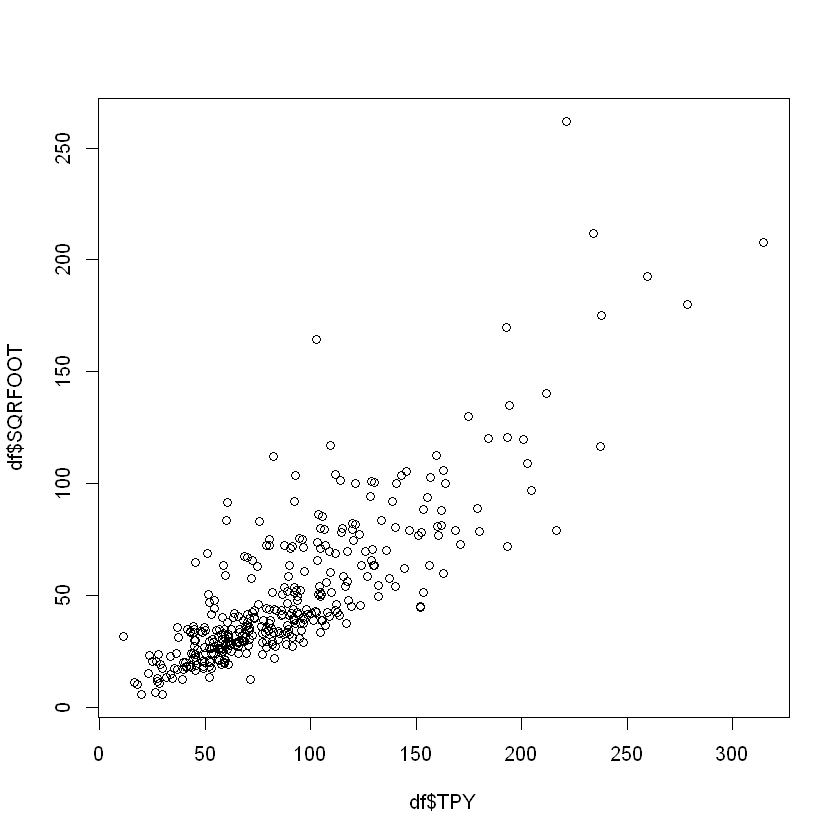

In [13]:
#Graph
plot(df$TPY,df$NUMBED)
plot(df$TPY,df$SQRFOOT)

c. Basic linear regression.

c(i). Fit a basic linear regression model using TPY as the outcome
variable and NUMBED as the explanatory variable. Summarize the fit by quoting the coefficient of determination, R2, and the
t-statistic for NUMBED.

In [14]:
#We build a linear model using the lm fonction
m1 <- lm(TPY ~ NUMBED, data = df)

#By using, the attributes of the model, we can retrieve the information that we need
print(attributes(m1))

#Summary with coeff, t-stat, R2 and R2-adj.
sm1<-summary(m1)

#Retrieve the results needed
print(sm1$coefficients)
print(sm1[8])
print(sm1[9])

$names
 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        

$class
[1] "lm"

              Estimate Std. Error    t value      Pr(>|t|)
(Intercept) -0.6551410 1.11506522 -0.5875361  5.572172e-01
NUMBED       0.9213922 0.01021399 90.2088625 7.874085e-247
$r.squared
[1] 0.9581991

$adj.r.squared
[1] 0.9580813



c(ii). Repeat c(i), using SQRFOOT instead of NUMBED. In terms of R2, which model fits better?

In [15]:
#Same steps as above
m2 <- lm(TPY ~ SQRFOOT, data = df)
sm2<-summary(m2)

print(sm2$coefficients)
print(sm2[8])
print(sm2[9])

             Estimate Std. Error  t value     Pr(>|t|)
(Intercept) 33.969459 2.44409190 13.89860 2.284101e-35
SQRFOOT      1.102515 0.04017186 27.44495 8.991726e-90
$r.squared
[1] 0.6796681

$adj.r.squared
[1] 0.6787657



R2 explains the proportion of variability explained by the regression line. If we compare the R-squared of the tow models, m1's is higher than m2's so we can say that m1 provides a better fit.

c(iii). Repeat c(i), using LOGTPY for the outcome variable and LOG(NUMBED) as the explanatory variable

In [16]:
#transformation
df$LOGTPY=log(df$TPY)
df$LOG.NUMBED=log(df$NUMBED)

#Regression
m3 <- lm(LOGTPY ~ LOG.NUMBED, data = df)
sm3<-summary(m3)

print(sm3$coefficients)
print(sm3[8])
print(sm3[9])

             Estimate Std. Error  t value      Pr(>|t|)
(Intercept) -0.150445 0.05671968 -2.65243  8.350177e-03
LOG.NUMBED   1.011936 0.01263128 80.11354 2.177688e-229
$r.squared
[1] 0.9475874

$adj.r.squared
[1] 0.9474397



c(iv). Repeat c(iii) using LOGTPY for the outcome variable and LOG(SQRFOOT) as the explanatory variable.

In [17]:
#transformation
df$LOG.SQRFOOT=log(df$SQRFOOT)

#Regression
m4 <- lm(LOGTPY ~ LOG.SQRFOOT, data = df)
sm4<-summary(m4)

print(sm4$coefficients)
print(sm4[8])
print(sm4[9])

             Estimate Std. Error  t value     Pr(>|t|)
(Intercept) 1.8050931 0.09524712 18.95168 7.775596e-56
LOG.SQRFOOT 0.6873674 0.02522553 27.24888 5.062932e-89
$r.squared
[1] 0.6765381

$adj.r.squared
[1] 0.6756269



Here again, m1 fits better than m2.